In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [254]:
data = pd.read_csv("db_power_plant.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [63]:
# check unique value
data['country_long'].unique()

array(['India'], dtype=object)

In [64]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [65]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [66]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

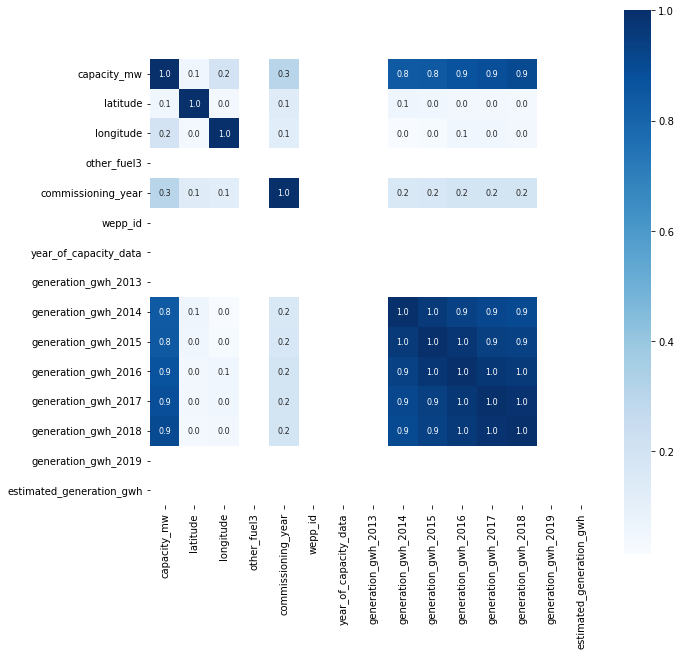

In [67]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

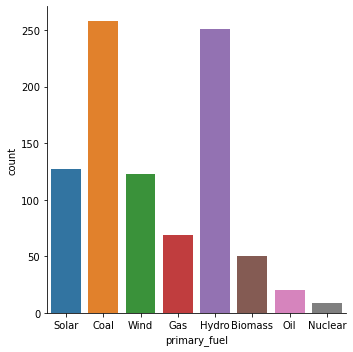

In [68]:
# compare
sns.catplot(x='primary_fuel', data=data, kind='count')

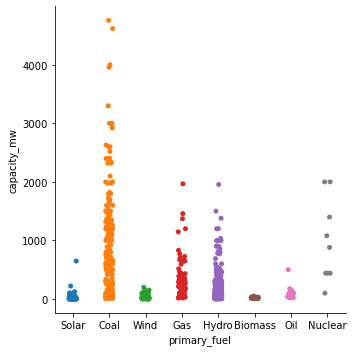

In [69]:
# compare
sns.catplot(x='primary_fuel', y='capacity_mw', data=data)

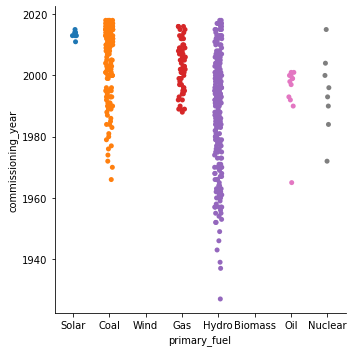

In [70]:
# compare
sns.catplot(x='primary_fuel', y='commissioning_year', data=data)

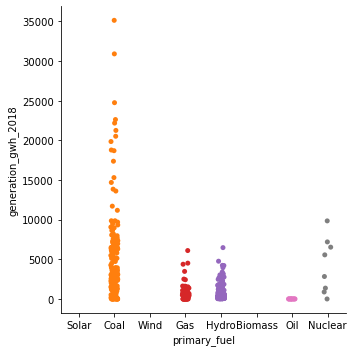

In [71]:
# compare
sns.catplot(x='primary_fuel', y='generation_gwh_2018', data=data)

In [255]:
data_columns = ['capacity_mw', 'primary_fuel', 'commissioning_year']
new_df = data[data_columns].copy()
new_df

,capacity_mw,primary_fuel,commissioning_year
0,2.5,Solar,2011.0
1,98.0,Coal,NaN
2,39.2,Wind,NaN
3,135.0,Gas,2004.0
4,1800.0,Coal,2015.0
...,...,...,...
902,1600.0,Coal,2016.0
903,3.0,Solar,NaN
904,25.5,Wind,NaN
905,80.0,Coal,NaN


In [74]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [256]:
# mapping on primary_fuel
new_df.primary_fuel = new_df.primary_fuel.map({'Solar':0, 'Coal':1, 'Wind':2, 'Gas':3, 'Hydro':4, 'Biomass':5, 'Oil':6, 'Nuclear':7})
new_df['primary_fuel'].value_counts()

1    258
4    251
0    127
2    123
3     69
5     50
6     20
7      9
Name: primary_fuel, dtype: int64

In [257]:
new_df.isnull().sum()

capacity_mw             0
primary_fuel            0
commissioning_year    380
dtype: int64

In [258]:
# fill null values by median
new_df['commissioning_year'] = new_df['commissioning_year'].fillna(data['commissioning_year'].median())

In [259]:
new_df.isnull().sum()

capacity_mw           0
primary_fuel          0
commissioning_year    0
dtype: int64

In [56]:
# drop flot column
#new_df.drop('country_long', axis=1, inplace=True)

,capacity_mw,primary_fuel,commissioning_year
0,2.5,0,2011.0
1,98.0,1,2001.0
2,39.2,2,2001.0
3,135.0,3,2004.0
4,1800.0,1,2015.0


In [83]:
# Model Training
X=new_df.drop('primary_fuel', axis=1)
y=new_df['primary_fuel']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [235]:
lr = LogisticRegression()

In [236]:
lr.fit(X_train, y_train)

C:\Users\mohsi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
prediction= lr.predict(X_test)

C:\Users\mohsi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- primary_fuel
Feature names seen at fit time, yet now missing:
- capacity_mw

  warnings.warn(message, FutureWarning)


In [238]:
accuracy_score(y_test, prediction)*100

48.458149779735685

In [239]:
# decison tree
dc = DecisionTreeClassifier()

In [240]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [241]:
prediction_dc = dc.predict(X_test)

In [242]:
accuracy_score(y_test, prediction_dc)*100

53.30396475770925

In [247]:
# KNN classification algo
kn = KNeighborsClassifier()

In [244]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [245]:
prediction_kn = kn.predict(X_test)

In [246]:
accuracy_score(y_test, prediction_kn)*100

60.352422907488986

# Capacity mega watt

In [269]:
new_df

,capacity_mw,primary_fuel,commissioning_year
0,2.5,0,2011.0
1,98.0,1,2001.0
2,39.2,2,2001.0
3,135.0,3,2004.0
4,1800.0,1,2015.0
...,...,...,...
902,1600.0,1,2016.0
903,3.0,0,2001.0
904,25.5,2,2001.0
905,80.0,1,2001.0


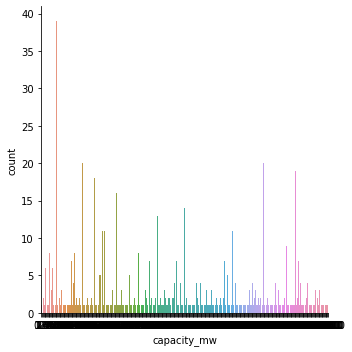

In [272]:
# compare
sns.catplot(x='capacity_mw', data=new_df, kind='count')

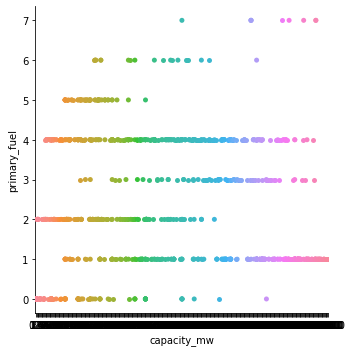

In [273]:
# compare
sns.catplot(x='capacity_mw', y='primary_fuel', data=new_df)

In [265]:
# Model Training
X=new_df.drop('capacity_mw', axis=1)
y=new_df['capacity_mw']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

In [274]:
# KNN classification algo
kn_mw = KNeighborsClassifier()

In [275]:
kn_mw.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'